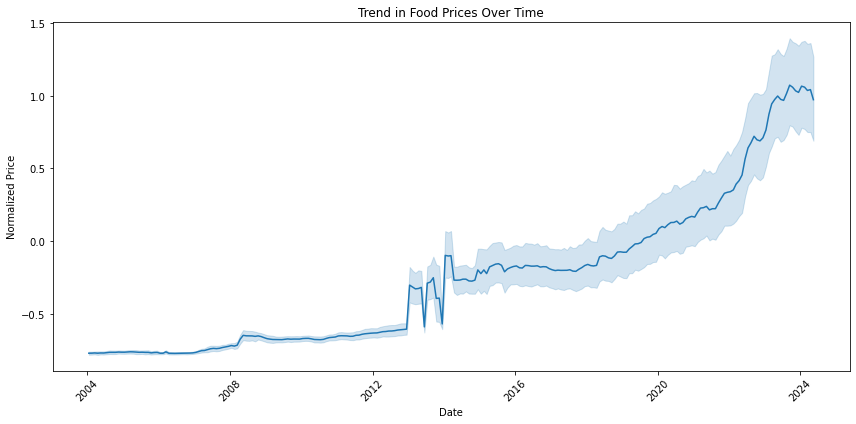

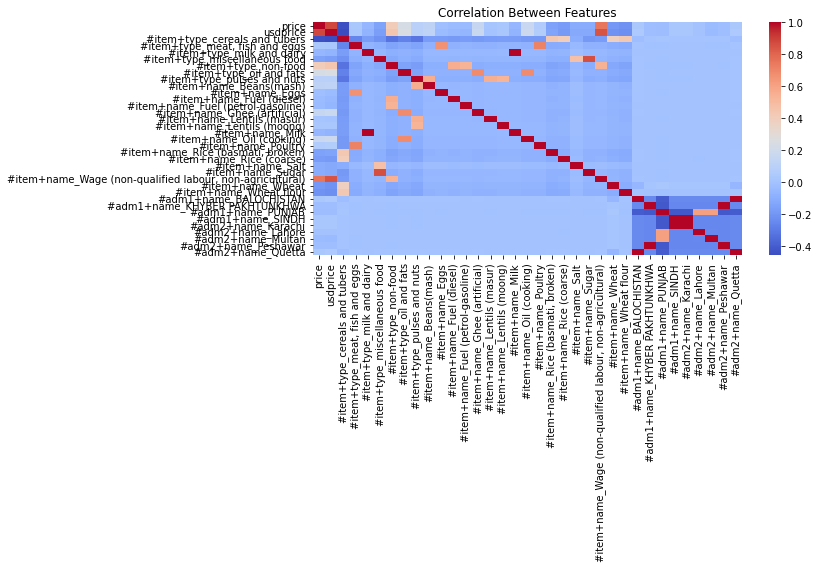

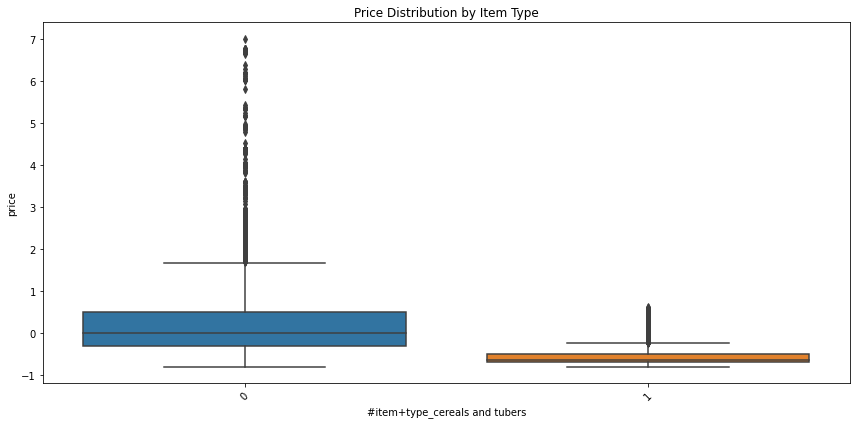

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = r'C:\Users\Arslan\Desktop\my project\FOOD PRICES.csv'
data = pd.read_csv(file_path)

# Handle column names
data.columns = data.iloc[0]
data = data.drop(0)

# Convert columns to appropriate data types
data['date'] = pd.to_datetime(data['#date'], errors='coerce')
data['price'] = pd.to_numeric(data['#value'], errors='coerce')
data['usdprice'] = pd.to_numeric(data['#value+usd'], errors='coerce')

# Fill missing values
data.fillna(method='ffill', inplace=True)

# Normalize numerical features
scaler = StandardScaler()
data[['price', 'usdprice']] = scaler.fit_transform(data[['price', 'usdprice']])

# Encode categorical variables
categorical_features = ['#item+type', '#item+name', '#adm1+name', '#adm2+name']
data = pd.get_dummies(data, columns=categorical_features)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the processed data
save_dir = r'C:\Users\Arslan\Desktop\my project'
os.makedirs(save_dir, exist_ok=True)
train_data.to_csv(os.path.join(save_dir, 'train_data.csv'), index=False)
test_data.to_csv(os.path.join(save_dir, 'test_data.csv'), index=False)

# Plot the trend in food prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='price')
plt.title('Trend in Food Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()

# Analyze price distribution by item type
item_type_column = '#item+type_'
matching_columns = [col for col in data.columns if col.startswith(item_type_column)]

if matching_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=matching_columns[0], y='price', data=data)
    plt.title('Price Distribution by Item Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"Item type column not found in the dataset after encoding.")
